In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X = np.c_[data["data"][:, 2:3],data["target"]]
y = data["data"][:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

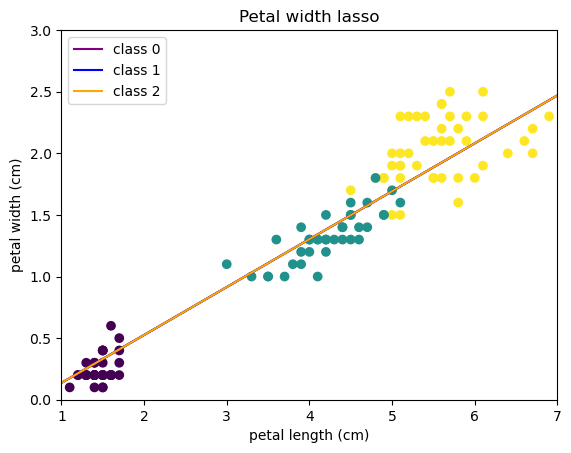

In [4]:
# regularization component: L1 regularization (Lasso)
# uses coordinate descent instead of gradient descent - each iterations fixes all coordinates except for a hyperlane
# subset, and only optimizes along the reduced coordinate block
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1,
                fit_intercept = True,
                #normalize = False, #only for old sklearn versions!
                copy_X = False,
                precompute = False, # if you want to customize the learning approach (you don't really need it)
                max_iter = 100,
                tol = 1e-4,
                warm_start = False, #True: continues from the last point, False: starts from scratch
                positive = False, #True: all weights should end up positive
                selection = "cyclic", # "random" - coordinate descent vs cyclic (optimization on the coordinate)
                random_state = 0)# for feature selection using 'selection' above

lasso_reg.fit(X_train, y_train)

plt.scatter(X_train[:, 0], y_train, c=X_train[:, 1]) #first column of the feature set, y values, feature data set
cs = ["purple","blue","orange"]
for i in range(3):
    #plotting predictions for the different classes
    xs = np.c_[np.linspace(1,7,20),i*np.ones(20)] 
    plt.plot(xs[:,0],lasso_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width lasso")
plt.ylim(0,3)
plt.xlim(1,7)
plt.legend()
plt.show()
#Works like feature selection

In [5]:
#class coefficient pushed to 0. so we only have one line
lasso_reg.coef_

array([0.38892663, 0.        ])

In [6]:
#another way to look at coefficients
lasso_reg.sparse_coef_.toarray() 
# useful for high number of features, since L1 works like feature selection and many weights can be 0

array([[0.38892663, 0.        ]])

In [8]:
lasso_reg.predict([[1,1]])

array([0.13651408])

In [9]:
#lasso_reg.predict - lasso_reg.coef_
lasso_reg.intercept_

-0.25241255020674

In [10]:
lasso_reg.n_iter_

2

In [11]:
#feature transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#StandardScaler: for numbers
num_pipeline = Pipeline([
                    ("stand_scale", StandardScaler())
])

#OneHotEncoder: for classes
class_pipeline = Pipeline([
                    ("one_hot_enc", OneHotEncoder())
])

#combining both scalers (num + class)
full_pipeline = ColumnTransformer([
         ("num", num_pipeline, [0]),
         ("class", class_pipeline, [1])
     ])

X_train_transf = full_pipeline.fit_transform(X_train)
X_test_transf = full_pipeline.transform(X_test)

In [12]:
#result: 1st column = numerical column, remaining 3 columns are from the OneHotEncoder
X_train_transf

array([[ 0.94751783,  0.        ,  0.        ,  1.        ],
       [ 0.38491447,  0.        ,  1.        ,  0.        ],
       [-1.30289562,  1.        ,  0.        ,  0.        ],
       [ 0.60995581,  0.        ,  0.        ,  1.        ],
       [ 1.00377816,  0.        ,  0.        ,  1.        ],
       [ 0.04735245,  0.        ,  1.        ,  0.        ],
       [-1.19037495,  1.        ,  0.        ,  0.        ],
       [ 0.72247648,  0.        ,  1.        ,  0.        ],
       [ 0.21613346,  0.        ,  1.        ,  0.        ],
       [ 0.10361279,  0.        ,  1.        ,  0.        ],
       [ 0.94751783,  0.        ,  0.        ,  1.        ],
       [-1.41541629,  1.        ,  0.        ,  0.        ],
       [ 0.72247648,  0.        ,  0.        ,  1.        ],
       [-1.24663528,  1.        ,  0.        ,  0.        ],
       [-1.30289562,  1.        ,  0.        ,  0.        ],
       [-0.1776889 ,  0.        ,  1.        ,  0.        ],
       [ 0.94751783,  0.

In [13]:
#re-initializing our Lasso model
from sklearn.linear_model import Lasso
lasso_reg_transf = Lasso(alpha = 0.1)
lasso_reg_transf.fit(X_train_transf, y_train)

Lasso(alpha=0.1)

In [14]:
#result: onehot-encoded classes all pushed to 0 except the L1 regularization
lasso_reg_transf.coef_

array([ 0.64755844, -0.        , -0.        ,  0.        ])

In [15]:
#training set stays the same (petal length)
X_train

array([[5.5, 2. ],
       [4.5, 1. ],
       [1.5, 0. ],
       [4.9, 2. ],
       [5.6, 2. ],
       [3.9, 1. ],
       [1.7, 0. ],
       [5.1, 1. ],
       [4.2, 1. ],
       [4. , 1. ],
       [5.5, 2. ],
       [1.3, 0. ],
       [5.1, 2. ],
       [1.6, 0. ],
       [1.5, 0. ],
       [3.5, 1. ],
       [5.5, 2. ],
       [5.7, 2. ],
       [5. , 2. ],
       [5.8, 2. ],
       [3.9, 1. ],
       [6.1, 2. ],
       [4.7, 1. ],
       [3.8, 1. ],
       [4.9, 2. ],
       [5.1, 2. ],
       [4.5, 2. ],
       [5. , 2. ],
       [4.7, 1. ],
       [5.2, 2. ],
       [4.5, 1. ],
       [1.6, 0. ],
       [5.1, 2. ],
       [4.2, 1. ],
       [3.6, 1. ],
       [4. , 1. ],
       [4.6, 1. ],
       [6. , 2. ],
       [1.5, 0. ],
       [1.1, 0. ],
       [5.3, 2. ],
       [4.2, 1. ],
       [1.7, 0. ],
       [1.5, 0. ],
       [4.9, 1. ],
       [1.5, 0. ],
       [5.1, 2. ],
       [3. , 1. ],
       [1.4, 0. ],
       [4.5, 1. ],
       [6.1, 2. ],
       [4.2, 1. ],
       [1.4,

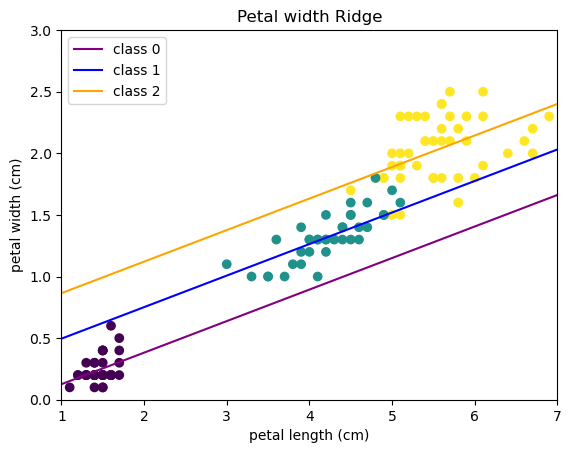

In [17]:
# L2 regularization: Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1,# larger is stronger
                fit_intercept = True,
                #normalize = False, #deprecated in older sklearn versions
                copy_X = True, #True: that our training set won't be overwritten
                max_iter = 1000,
                tol = 1e-3,
                solver = "auto",
                random_state = 0)# for sag solver

ridge_reg.fit(X_train, y_train)

plt.scatter(X_train[:, 0], y_train, c=X_train[:, 1])
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(1,7,20),i*np.ones(20)]
    plt.plot(xs[:,0],ridge_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width Ridge")
plt.ylim(0,3)
plt.xlim(1,7)
plt.legend()
plt.show()
#NOW: have separation from classes again

In [18]:
#2nd coefficient now non-zero!!!
ridge_reg.coef_

array([0.25600827, 0.36942359])

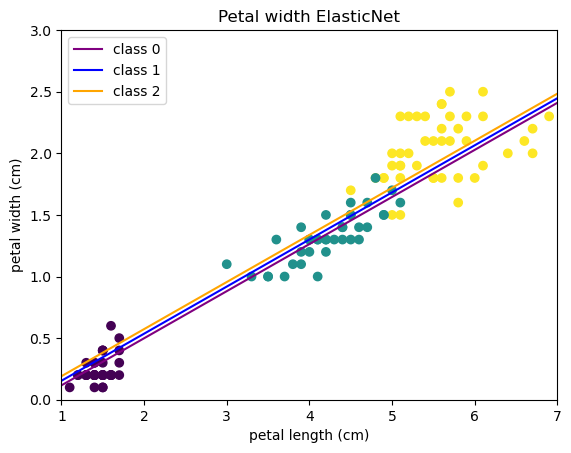

0.8807141093071915

In [20]:
# NOW: combining L1 + L2 regularization
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet(alpha = 0.1,# larger is stronger
                  l1_ratio = 0.5,
                    fit_intercept = True,
                    #normalize = False, #ignore in newer sklearn versions
                    precompute = False,
                    copy_X = True,
                    max_iter = 1000,
                    tol = 1e-3,
                    warm_start = False,
                    positive = False,
                    selection = "cyclic",
                    random_state = 0 # for random selection
                 )

en_reg.fit(X_train, y_train)

plt.scatter(X_train[:, 0], y_train, c=X_train[:, 1])
cs = ["purple","blue","orange"]
for i in range(3):
    xs = np.c_[np.linspace(1,7,20),i*np.ones(20)]
    plt.plot(xs[:,0],en_reg.predict(xs),label="class "+str(i),c=cs[i])

plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width ElasticNet")
plt.ylim(0,3)
plt.xlim(1,7)
plt.legend()
plt.show()

en_reg.score(X_test,y_test)
#result: very slight separation
#l1 and l2 have different regularization strengths for the c value

In [22]:
#result: very small non-zero component (almost 0)
en_reg.coef_

array([0.38231094, 0.03716131])

In [23]:
#import the R² scoring
#same as our score from the elasticnet
from sklearn.metrics import r2_score # coefficient of determination
r2_score(y_true = y_test,
        y_pred = en_reg.predict(X_test),
        sample_weight = None,# size (n_samples,) if we want specific sample weights
        multioutput = "uniform_average")

0.8807141093071915